## 1. Завантажити середовище за допомогою gym.make('FrozenLake-v1').

In [67]:
!pip install gym

import gym

# Завантажуємо середовище FrozenLake-v1
env = gym.make('FrozenLake-v1', render_mode='human')
env.reset()  # Скидаємо середовище до початкового стану

0

## 2. Використовуючи опис функції compute_value_function() в конспекті у розділі Ітерації за політиками запрограмувати її повний вигляд.

In [68]:
import numpy as np

def compute_value_function(env, policy, gamma=0.9, theta=1e-6):
    """
    Обчислює функцію вартості для заданої політики.

    Параметри:
    - env: середовище Gym
    - policy: політика (масив дій для кожного стану)
    - gamma: коефіцієнт дисконтування
    - theta: поріг для завершення ітерацій

    Повертає:
    - value_function: обчислена функція вартості для кожного стану
    """
    value_function = np.zeros(env.observation_space.n)

    while True:
        delta = 0
        for state in range(env.observation_space.n):
            v = 0
            action = policy[state]
            for prob, next_state, reward, done in env.P[state][action]:
                v += prob * (reward + gamma * value_function[next_state])
            delta = max(delta, abs(v - value_function[state]))
            value_function[state] = v
        if delta < theta:
            break
    return value_function


In [69]:
# Приклад випадкової політики
policy = np.random.choice(env.action_space.n, size=(env.observation_space.n))
value_function = compute_value_function(env, policy)
print("Обчислена функція вартості для кожного стану:", value_function)


Обчислена функція вартості для кожного стану: [0.         0.00168402 0.00393048 0.00294658 0.         0.
 0.00622632 0.         0.02136584 0.04985371 0.01682401 0.
 0.         0.1279893  0.37677733 0.        ]


## 3. Використовуючи опис функції policy_iteration() в конспекті у розділі Ітерації за політиками запрограмувати її повний вигляд.

In [70]:
def policy_iteration(env, gamma=0.9, theta=1e-6):
    """
    Виконує ітерацію за політикою для знаходження оптимальної політики.

    Параметри:
    - env: середовище Gym
    - gamma: коефіцієнт дисконтування
    - theta: поріг для завершення ітерації

    Повертає:
    - policy: оптимальна політика
    - value_function: функція вартості для оптимальної політики
    """
    policy = np.random.choice(env.action_space.n, env.observation_space.n)
    while True:
        value_function = compute_value_function(env, policy, gamma, theta)
        policy_stable = True
        for state in range(env.observation_space.n):
            old_action = policy[state]
            action_values = np.zeros(env.action_space.n)
            for action in range(env.action_space.n):
                for prob, next_state, reward, done in env.P[state][action]:
                    action_values[action] += prob * (reward + gamma * value_function[next_state])
            best_action = np.argmax(action_values)
            if best_action != old_action:
                policy_stable = False
            policy[state] = best_action
        if policy_stable:
            break
    return policy, value_function


In [71]:
# Запускаємо ітерацію за політикою
optimal_policy, optimal_value_function = policy_iteration(env)

print("Оптимальна політика:", optimal_policy)
print("Функція вартості для оптимальної політики:", optimal_value_function)


Оптимальна політика: [0 3 0 3 0 0 0 0 3 1 0 0 0 2 1 0]
Функція вартості для оптимальної політики: [0.06888673 0.06141154 0.07440786 0.05580526 0.09185135 0.
 0.11220737 0.         0.14543417 0.24749575 0.29961685 0.
 0.         0.37993513 0.63901979 0.        ]


## 4. Візуалізувати отриману оптимальну політику за допомогою функції show_render() з конспекта.

In [72]:
import time
import matplotlib.pyplot as plt

def show_render(env, policy):
    """
    Візуалізує роботу агента в середовищі FrozenLake відповідно до оптимальної політики.

    Параметри:
    - env: середовище Gym
    - policy: оптимальна політика (масив дій для кожного стану)
    """
    state = env.reset()
    env.render()  # Відображаємо початковий стан
    time.sleep(1)  # Затримка для зручного перегляду

    done = False
    while not done:
        action = policy[state]  # Отримуємо дію з політики
        state, reward, done, _ = env.step(action)  # Виконуємо дію
        env.render()  # Відображаємо новий стан
        time.sleep(0.5)  # Затримка між кроками для візуалізації

    if reward > 0:
        print("Агент досягнув мети!")
    else:
        print("Агент потрапив у пастку або завершив епізод без досягнення мети.")


In [73]:
env = gym.make('FrozenLake-v1', render_mode="human")
optimal_policy, _ = policy_iteration(env)


show_render(env, optimal_policy)

Агент досягнув мети!


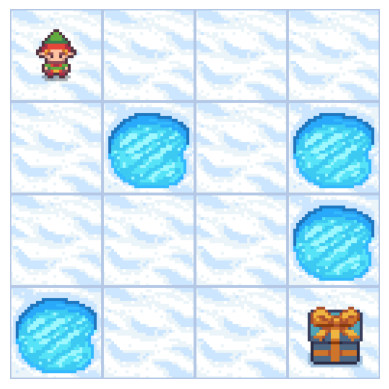

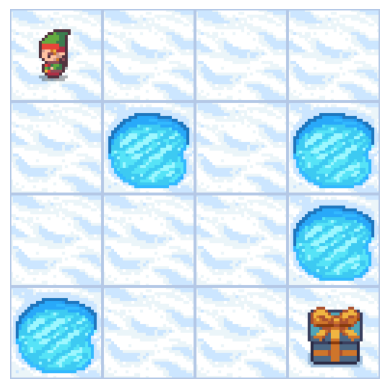

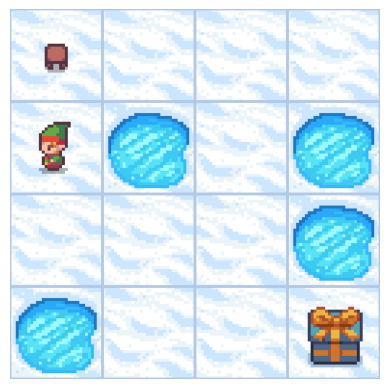

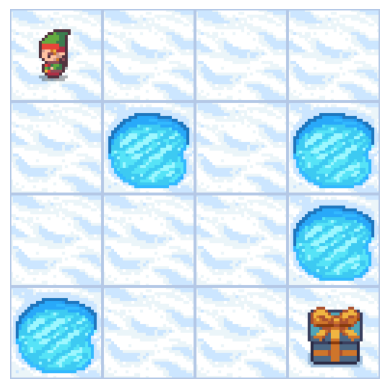

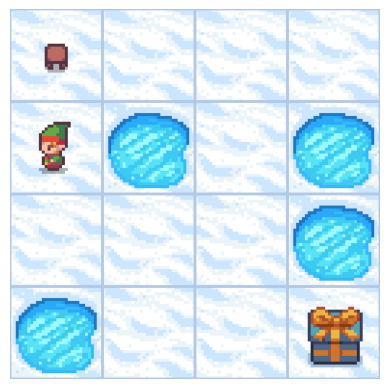

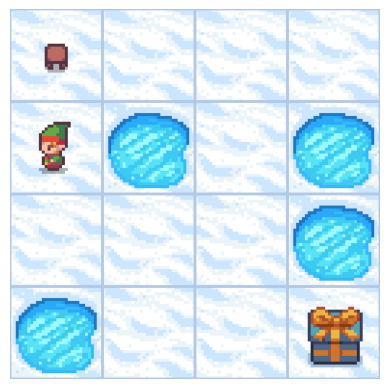

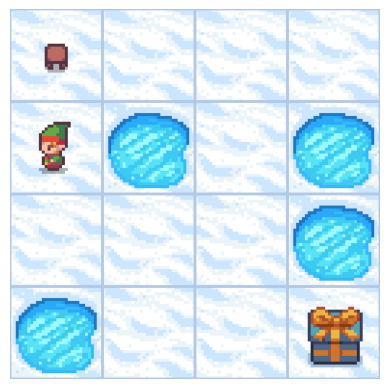

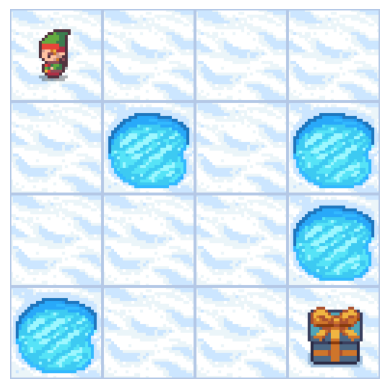

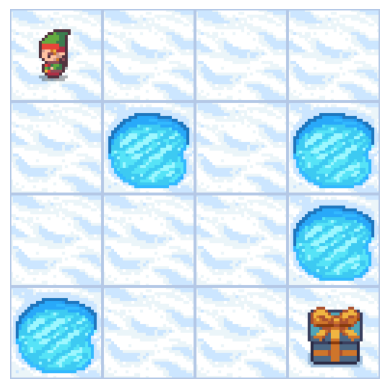

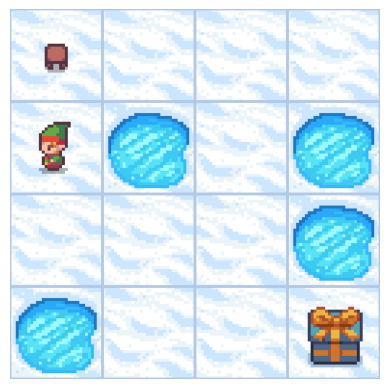

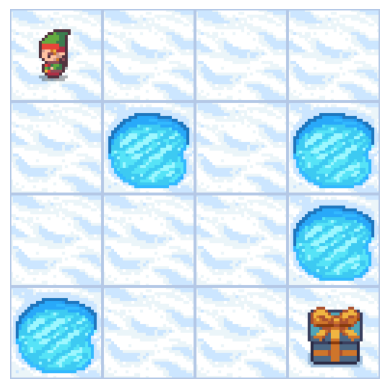

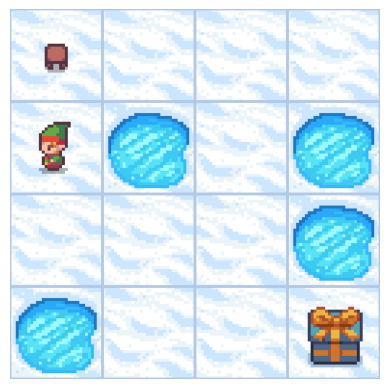

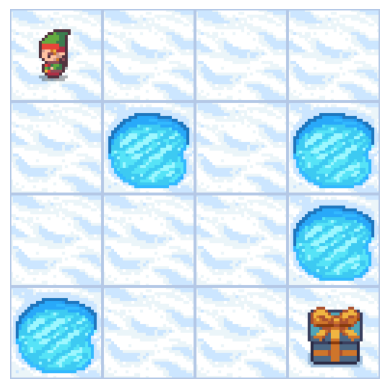

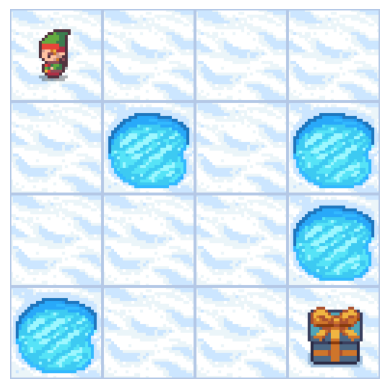

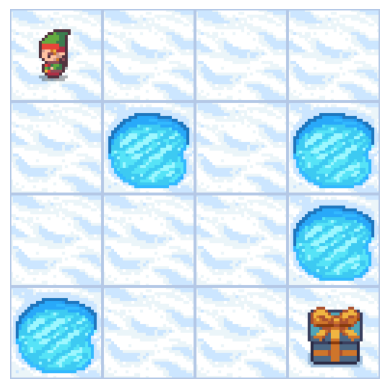

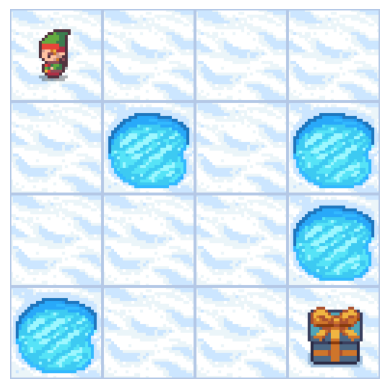

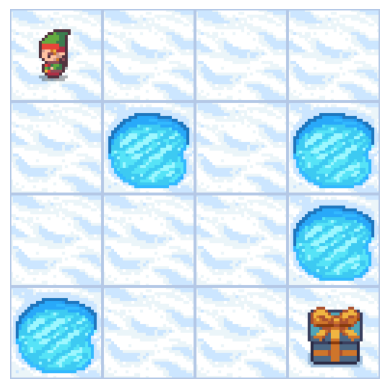

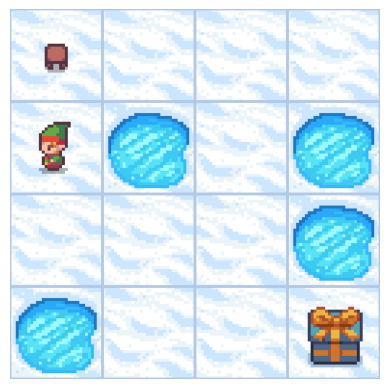

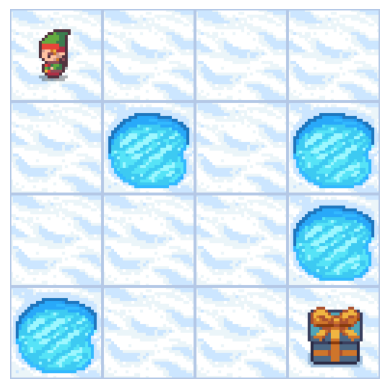

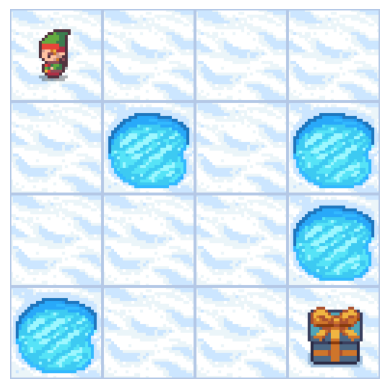

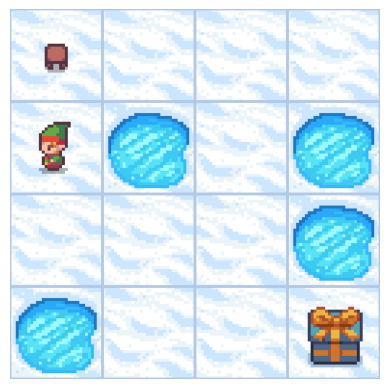

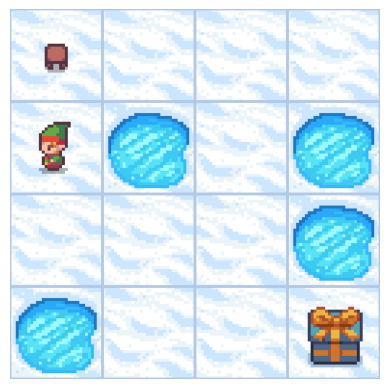

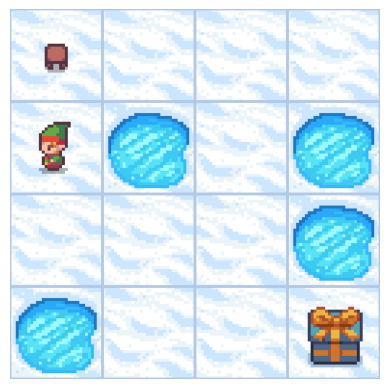

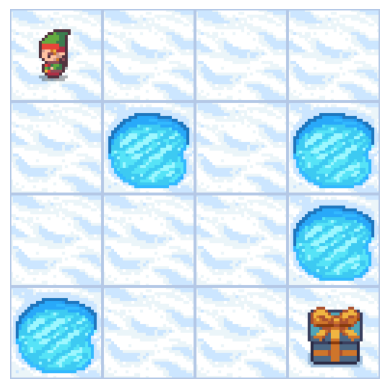

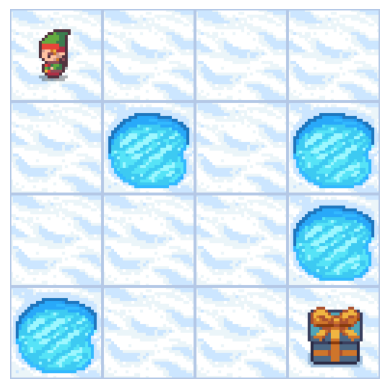

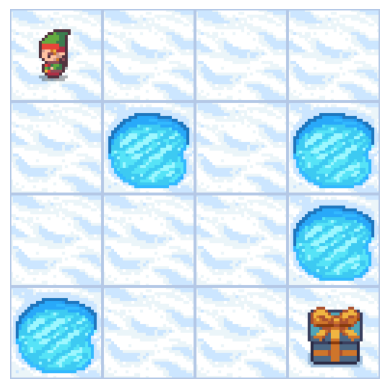

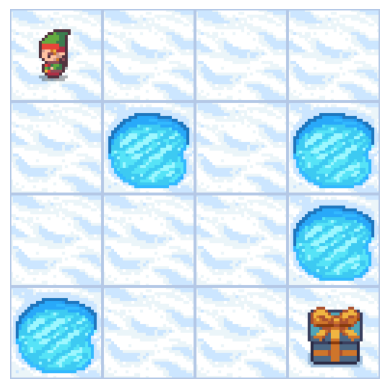

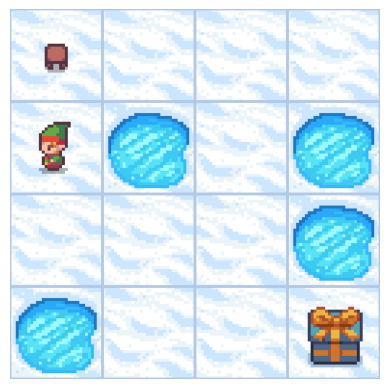

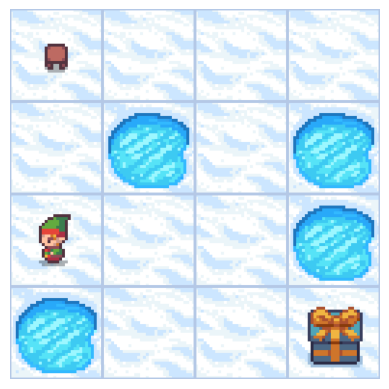

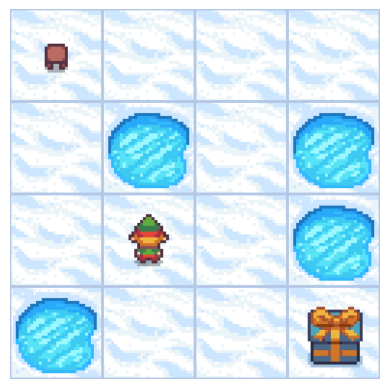

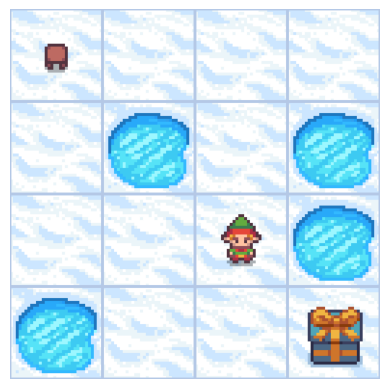

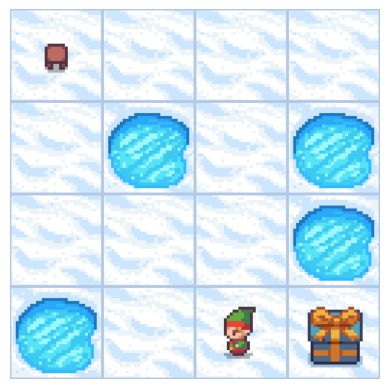

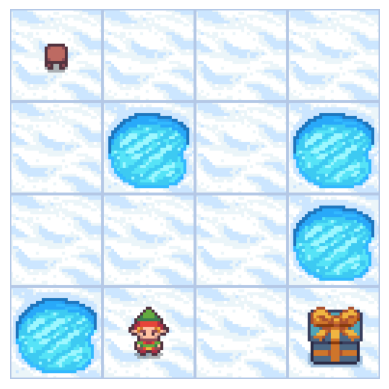

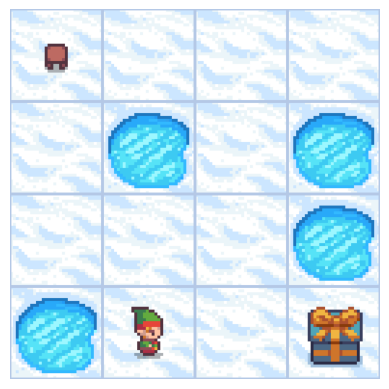

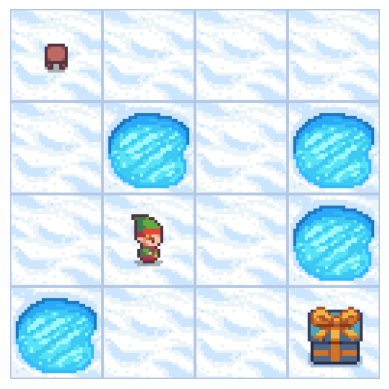

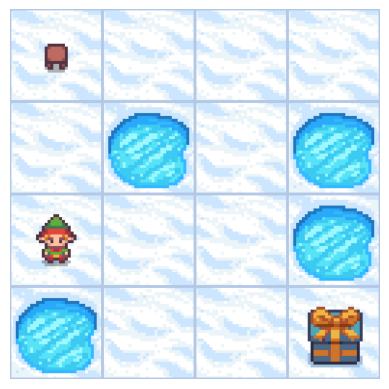

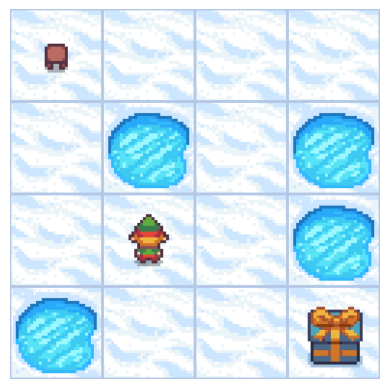

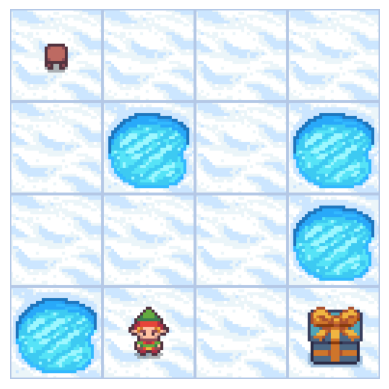

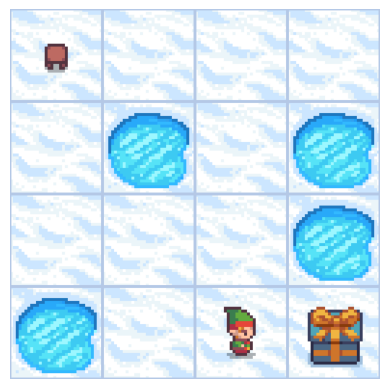

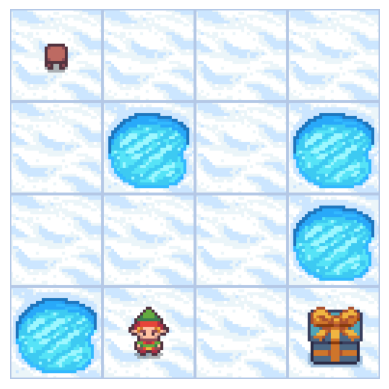

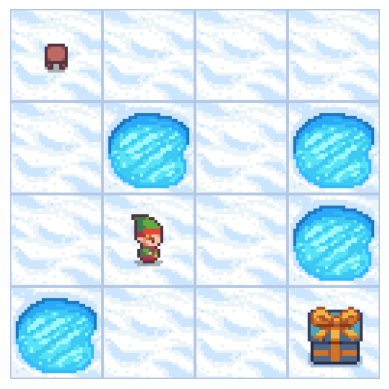

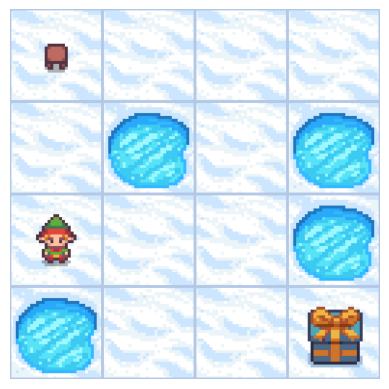

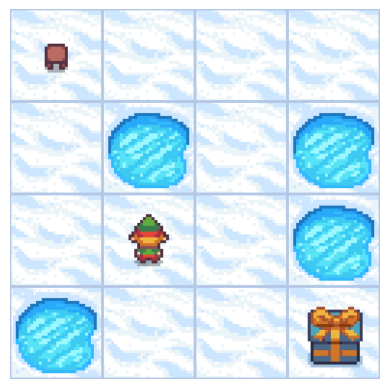

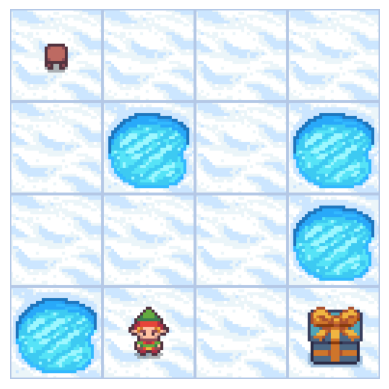

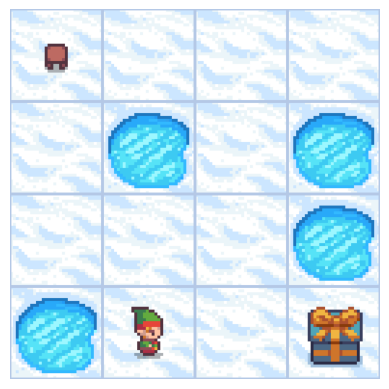

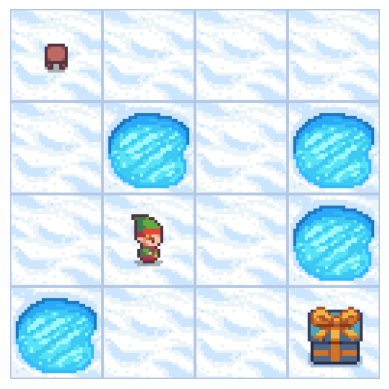

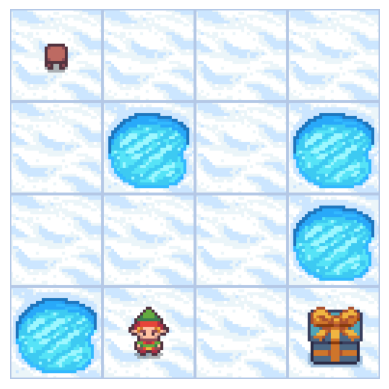

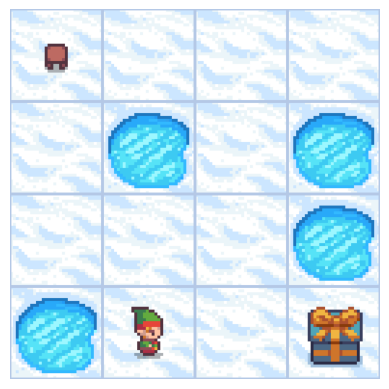

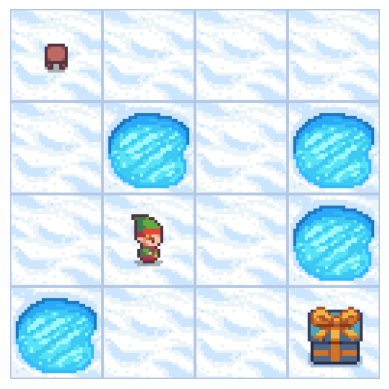

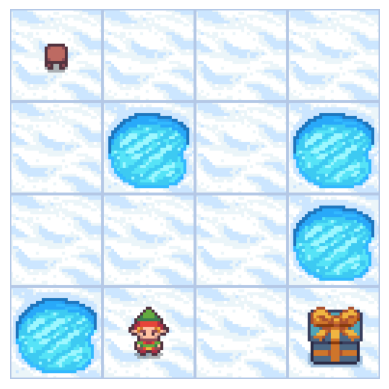

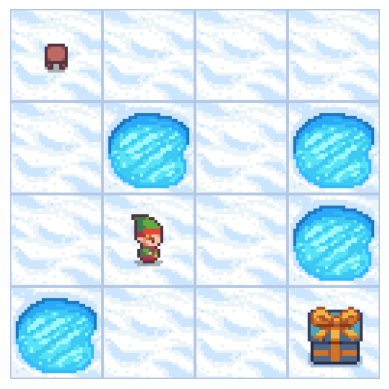

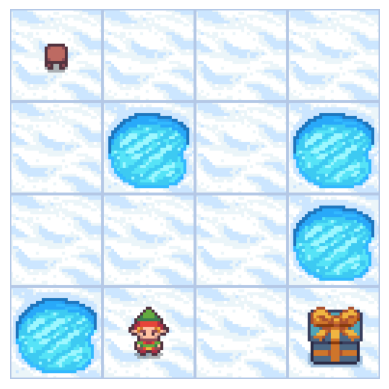

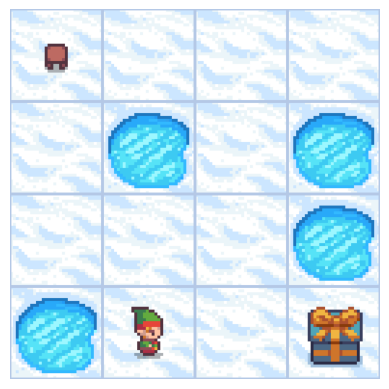

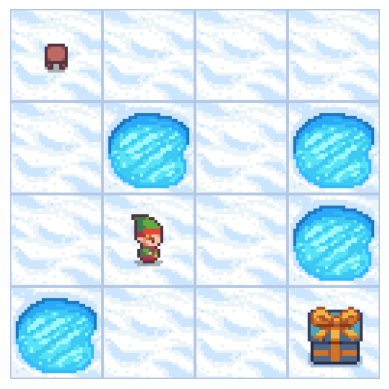

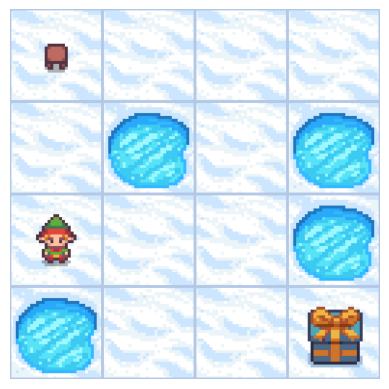

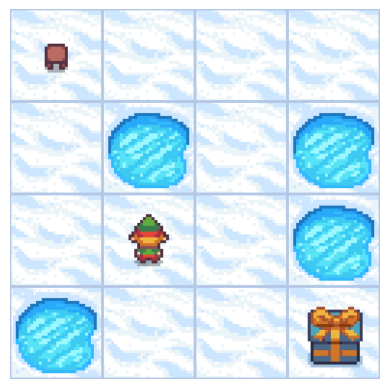

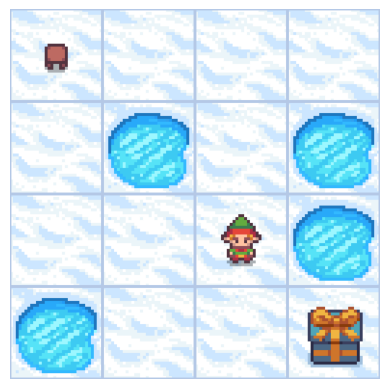

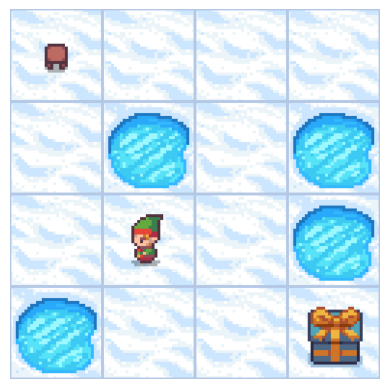

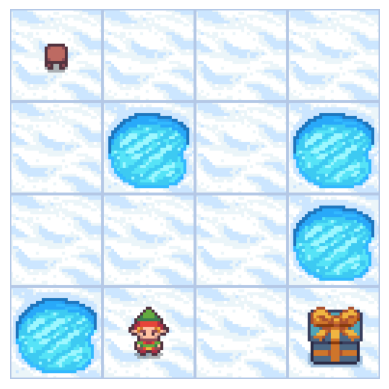

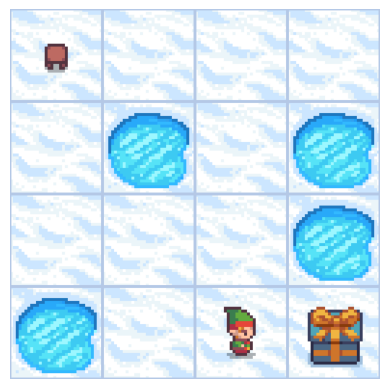

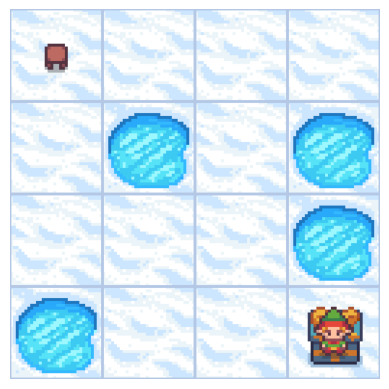

Агент досягнув мети!


In [76]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def show_render(img):
    """
    Відображає зображення середовища за допомогою matplotlib.
    """
    plt.imshow(img)
    plt.axis('off')  # Вимкнути осі
    plt.show()

# Ініціалізація середовища FrozenLake з режимом рендерингу 'rgb_array'
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array")


# Скидаємо середовище та отримуємо початкове зображення
observation = env.reset()
img = env.render()  # Отримуємо зображення
img = np.squeeze(img)  # Видаляємо зайвий вимір
show_render(img)  # Візуалізація початкового стану

# Виконуємо дії згідно з оптимальною політикою
done = False
while not done:
    action = optimal_policy[observation]  # Використання оптимальної політики
    observation, reward, done, info = env.step(action)  # Виконуємо дію

    # Отримуємо нове зображення середовища після дії та візуалізуємо його
    img = env.render()
    img = np.squeeze(img)  # Видаляємо зайвий вимір
    show_render(img)

    if done:
        if reward > 0:
            print("Агент досягнув мети!")
        else:
            print("Агент потрапив у пастку або завершив епізод без досягнення мети.")
        break

# Закриваємо середовище
env.close()


##Висновок

У цьому завданні ми успішно застосували метод ітерації за політикою для розв'язання задачі навчання з підкріпленням у середовищі FrozenLake-v1. Основні кроки і результати включають:

  1. Завантаження середовища FrozenLake-v1: Ми створили середовище з OpenAI Gym, що моделює задачу, де агент повинен досягти кінцевої цілі, рухаючись по замерзлому озеру і уникаючи пасток.

  2. Реалізація функції compute_value_function(): Ця функція обчислює функцію вартості для кожного стану відповідно до поточної політики. Вона використовує ітерацію Беллмана для знаходження очікуваних винагород для кожного стану, якщо агент діятиме згідно з поточною політикою.

  3. Реалізація функції policy_iteration(): Ми використали метод ітерації за політикою для обчислення оптимальної політики. Алгоритм чергує кроки оцінки політики та покращення політики, доки не досягає стабільної політики, яка максимізує винагороду.

  4. Візуалізація проходження агента: За допомогою оптимальної політики ми візуалізували проходження агента, показуючи його дії в середовищі на кожному кроці. Агент, діючи згідно з оптимальною політикою, мав змогу з високою ймовірністю досягти цільового стану, уникаючи пасток.

  5. Результати та досягнення: Завдяки оптимальній політиці агент досягнув кінцевої цілі у більшості спроб, що свідчить про ефективність ітерації за політикою в задачах навчання з підкріпленням. У середовищі FrozenLake алгоритм допоміг агенту визначити найкращий шлях до цілі.

## Загальні висновки
  Цей проект демонструє, як методи ітерації за політикою та обчислення функції вартості допомагають агенту ухвалювати оптимальні рішення в стохастичному середовищі. Алгоритми навчання з підкріпленням, такі як ітерація за політикою, є потужними інструментами для вирішення задач, де агент має вибирати дії на основі довгострокових винагород.